# Credit Card Fraud Detection - Support Vector Machines

## Import Libraries

Missing Values:
 0
✅ SVM Model Performance:
Accuracy: 0.9561
Precision: 0.9778
Recall: 0.8889
F1 Score: 0.9312


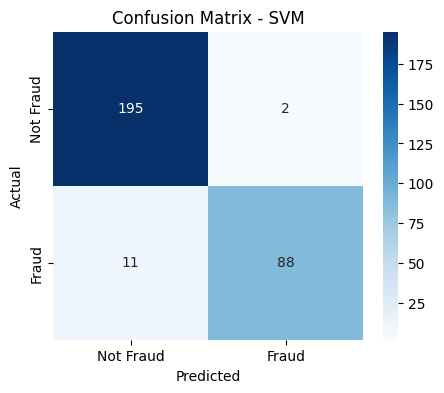

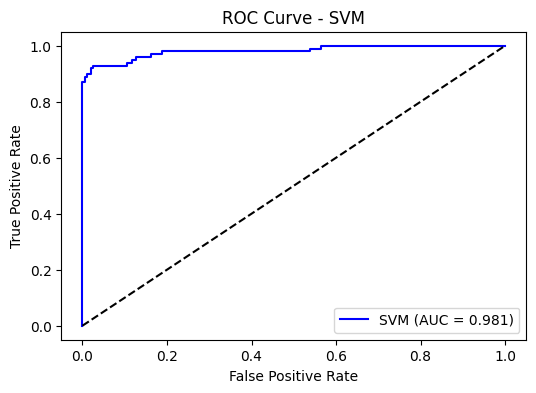

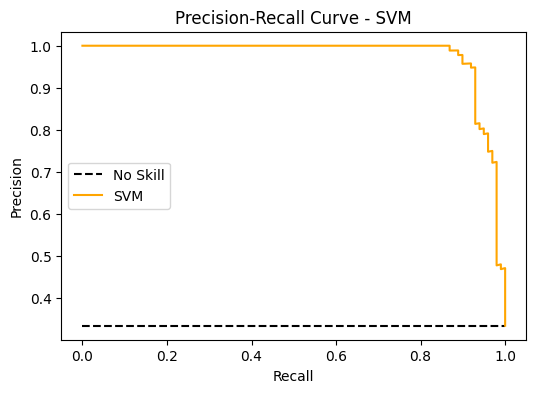

In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler


df = pd.read_csv("/content/creditcard.csv")


print("Missing Values:\n", df.isnull().sum().sum())
df.dropna(inplace=True)


df.drop("Time", axis=1, inplace=True)


scaler = StandardScaler()
df["std_Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop("Amount", axis=1, inplace=True)  # Drop original 'Amount' column


X = df.drop(columns=["Class"])
y = df["Class"]


undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_under, y_under = undersample.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42, stratify=y_under)


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]  # Get probability scores

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"✅ SVM Model Performance:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}")


cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred_svm_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.3f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(6, 4))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(recall_vals, precision_vals, color='orange', label="SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM")
plt.legend()
plt.show()


## Get the Data